a. Which are the top 10 most common consensus-conforming sequences found
among all input sequences?

Help on functions: help(common_seq)

In [216]:
#Chunk (a)
#Import python's collections.Counter
from collections import Counter
def common_seq(output_file, top_n=10):
    """
    This function takes output file from part1.py and returns the top 10 most 
    common consensus-conforming sequences found among all input sequences.
        
    Args:
        Output_file(.txt file): File with all the DNA consensus found.
        consensus (string) : The template to check matches.
            
    Returns:
        Most common consensus conforming sequence and number of occurances.  
        
    Example:
        >common_seq("test_part2_output.txt") 
        output = {'GGGACTTTCC': 1, 'GGGAATTTCC': 1, 'GGGAAATTCC': 1}     
    """
    #define an empty list to add only sequences from file
    count = []
    #open and read each line in the file
    with open(output_file, 'r') as file:
        #skip headings
        for _ in range(3):
            next(file)
        #loop to index 3 and retrieve 4th column(4th column contains sequence)
        for line in file:
            col = line.strip().split("\t")
            seq = col[3]
            count.append(seq)
    #use Counter to count number of occurances           
    max = Counter(count)
    #use .most_common(top_n) method of the Counter to get top 10 occurances
    top_10 = max.most_common(top_n)
    #print top 10 sequences
    top_10_seq = {}
    for sequence, num in top_10:
        #print(f"Sequence: {sequence}, Count: {num}")
        top_10_seq[sequence] = num
    return (top_10_seq)

In [220]:
common_seq("part1_output.txt") #run this code

{'GGGAAATTCC': 456,
 'GGGAATTTCC': 430,
 'GGGAATTCCC': 416,
 'GGGGAATTCC': 408,
 'GGGGATTTCC': 382,
 'GGGACTTTCC': 346,
 'GGGAAATCCC': 230,
 'GGGATTTCCC': 230,
 'GGGGTTTTCC': 221,
 'GGGGCTTTCC': 209}

b. How many sequences did not contain any sequences conforming with the user-specified consensus?

Help on functions: help(no_seq)

In [5]:
#Chunk (b)
#Import all the modules
from Bio import SeqIO
def no_seq(input_file, output_file):
    """
    This function takes output file from part1.py and returns the number of sequences 
    that did not contain any sequences conforming with the user-specified consensus.
        
    Args:
        input_file(.fasta file): File with all the DNA sequences (part1 input)
        output_file (.txt file) : File with all the consensus conforming sequences (part1 output)
            
    Returns:
        Number of sequences that did not contain any sequences conforming with the user-specified consensus.  
        
    Example:
        >no_seq("test_part2_input.fasta","test_part2_output.txt") 
        output = 1  
    """
    
    #define an empty list to add only sequence id from input file
    input_id = []
    #use Biopython and read each lines in the file
    for seq_input in SeqIO.parse(input_file, "fasta"):
        #retrieve only sequence id
        seq_id = seq_input.id
        input_id.append(seq_id)
    #define an empty list to add only sequence id from output file
    count = []
    #open and read each lines in the file
    with open(output_file, 'r') as file:
        #skip headings
        for _ in range(3):
            next(file)
        #loop to index 1 and retrieve 2nd column(2nd column contains sequence id)
        for line in file:
            col = line.strip().split("\t")
            seq = col[1]
            count.append(seq)
        #remove duplicates 
        unique_count = set(count)
        result = len(input_id)-len(unique_count)
    return (result)

In [7]:
no_seq("RelA.fasta","part1_output.txt") #run this code

5850


25940

Some visualisation for the data obtained:

In [49]:
#import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

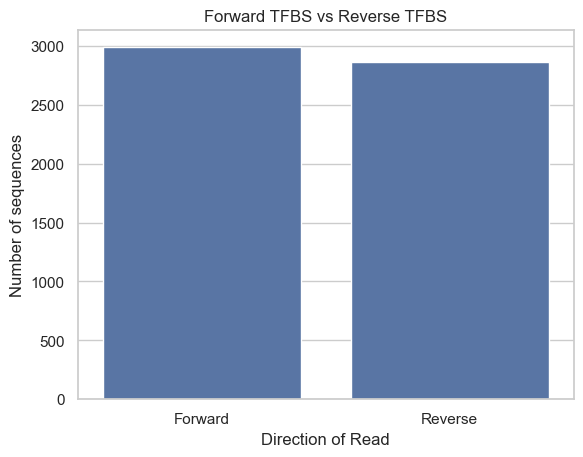

In [233]:
#Chunk (c)
#read the file
def plot1():
    file = "part1_output.txt"
    df = pd.read_csv(file, sep='\t', header=1)
    #extract forward/reverse data
    df['read'] = df['Description'].str.extract(r'(Forward|Reverse)')
    count = df['read'].value_counts()
    #bar plot
    sns.barplot(x=count.index , y=count.values)
    #add plot details
    plt.xlabel('Direction of Read')
    plt.ylabel('Number of sequences')
    plt.title('Forward TFBS vs Reverse TFBS')
    plt.show()
if __name__ == "__main__":
    plot1()

Total number of sequences in the input file: 30000
Total number of sequences that did not contain any sequences conforming consensus :259400

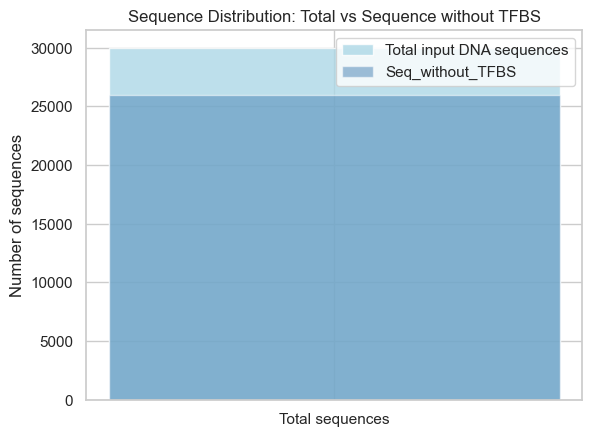

In [235]:
#Chunk (d)
#import modules
import seaborn as sns
import matplotlib.pyplot as plt
#create categorical data
def plot2():
    groups = ['Seq_without_TFBS', 'Seq_with_TFBS']
    data = [25940, 4060]
    fig, ax = plt.subplots()
    #define visuals
    ax.bar(['Total sequences'],[30000], color = 'lightblue', label = 'Total input DNA sequences', alpha = 0.8)
    ax.bar(['Total sequences'],[25940], color = 'steelblue', label = 'Seq_without_TFBS', alpha = 0.5)
    #add plot details
    ax.set_ylabel('Number of sequences')
    ax.set_title('Sequence Distribution: Total vs Sequence without TFBS')
    ax.legend()
    plt.show()
if __name__ == "__main__":
    plot2()